## Problem Statement

Prepare a model for glass classification using KNN

**Data Description:**

    RI : refractive index
    Na : Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
    Mg : Magnesium
    AI : Aluminum
    Si : Silicon
    K  : Potassium
    Ca : Calcium
    Ba : Barium
    Fe : Iron

**Type: Type of glass: (class attribute)**
 
    1 -- building_windows_float_processed
    2 -- building_windows_non_float_processed
    3 -- vehicle_windows_float_processed
    4 -- vehicle_windows_non_float_processed (none in this database)
    5 -- containers
    6 -- tableware
    7 -- headlamps

# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# warnings.filterwarnings('ignore')

In [2]:
rawData = pd.read_csv('glass.csv',header=0, names=['refractive_index', 'Sodium', 'Magnesium', 'Aluminum',
                                                   'Silicon', 'Potassium', 'Calcium', 'Barium', 'Iron','Type'
                                                  ]
                     )
rawData

,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In optics, the refractive index of a material is a dimensionless number that describes how fast light travels through the material.

As stated in the problem statement the columns Sodium to Iron are expressed as a percentage by weight. It appears that these the metals or chemical composition of the final glass oxide. Meaning columns sodium to Iron are expressed in fractions totalling to 1, More or less i believe these compositions will decide the type of glass.

Hence, we can say that Refractive index is a property of the type of glass, and rest of the columns are the composition of the Glass. let us check the relationship with type of glass

### Checking Null values in the dataset

In [3]:
rawData.isnull().sum()

refractive_index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
Type                0
dtype: int64

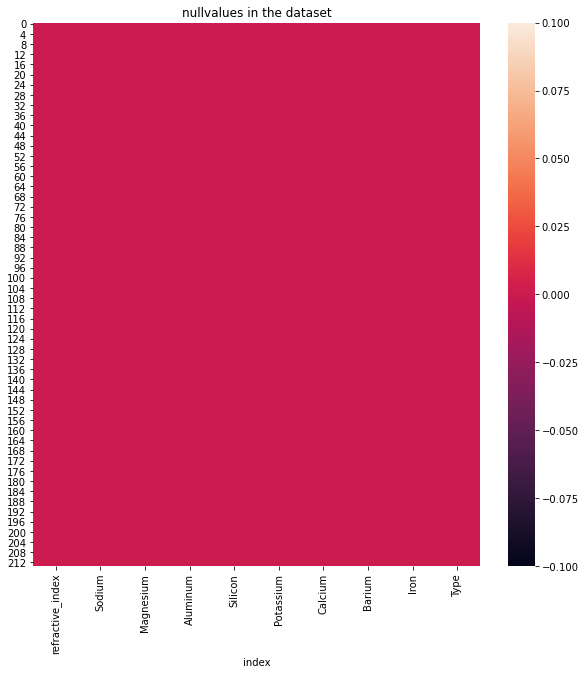

In [4]:
plt.figure(figsize=(10,10))
sns.heatmap(rawData.isnull())
plt.title('nullvalues in the dataset')
plt.xlabel('index')
plt.show()

### Understanding Y variable - 'TYPE' - TYPE OF GLASS

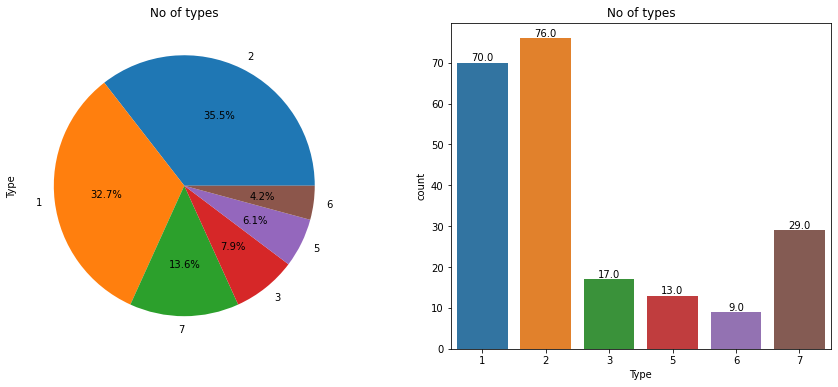

In [5]:
f,ax = plt.subplots(1,2,figsize=(15,6))
rawData.Type.value_counts().plot.pie(ax=ax[0],autopct='%1.1f%%')
ax[0].set_title('No of types')
sns.countplot(x='Type',data=rawData,ax=ax[1])
ax[1].set_title('No of types')
for p in ax[1].patches:
        ax[1].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+p.get_width() / 2, p.get_height()),
                       ha='center',va='top',xytext = (0, 10), textcoords = 'offset points')
plt.show()

In [6]:
rawData.Type.value_counts(ascending=True)

6     9
5    13
3    17
7    29
1    70
2    76
Name: Type, dtype: int64

As we can see this is a multiclass classification problem and two the classes dominate the dataset, but still it is not a highly imbalance dataset.

### Understanding the X variables - INDIVIDUALLY & COLLECTIVELY

**Birds Eye view of all the variable / Features**

In [7]:
rawData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
refractive_index,214.0,1.518365,0.003037,1.51115,1.516523,1.51768,1.519157,1.53393
Sodium,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Magnesium,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Aluminum,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Silicon,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
Potassium,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Calcium,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Barium,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Iron,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


In [8]:
rawData.dtypes

refractive_index    float64
Sodium              float64
Magnesium           float64
Aluminum            float64
Silicon             float64
Potassium           float64
Calcium             float64
Barium              float64
Iron                float64
Type                  int64
dtype: object

As we can see that all the independent features are Continuous features, but our dependent vaiable is a discreete feature, which makes it a classification problem. Further when we compare the means and medians of every respective feature we can infer that almost all features are nearly normally distributed. 

### Univatiate analysis 

**Refractive Index VS Type**

,refractive_index
Type,
1,1.518718
2,1.518619
3,1.517964
5,1.518928
6,1.517456
7,1.517116


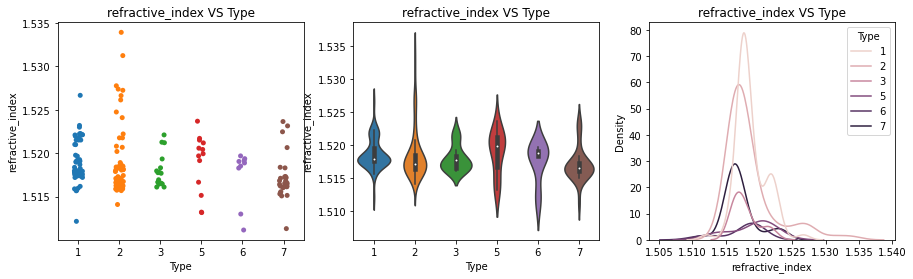

In [9]:
f,ax = plt.subplots(1,3,figsize=(15,4))
sns.stripplot(x=rawData.Type,y=rawData.refractive_index,ax=ax[0])
ax[0].set_title('refractive_index VS Type')
sns.violinplot(x=rawData.Type,y=rawData.refractive_index,ax=ax[1])
ax[1].set_title('refractive_index VS Type')
sns.kdeplot(hue=rawData.Type,x=rawData.refractive_index,ax=ax[2])
ax[2].set_title('refractive_index VS Type')

rawData.groupby('Type')['refractive_index'].mean().transpose().to_frame().style.background_gradient(cmap='summer')

As we can see that the mean values of "refractor index" are more or less same for all the types / categories of glasses. Further the varience in each values is also so less that it will not be a good extimator / predictor / defferentiator of classes/catefories of glasses.

,Sodium
Type,
1,13.242286
2,13.111711
3,13.437059
5,12.827692
6,14.646667
7,14.442069


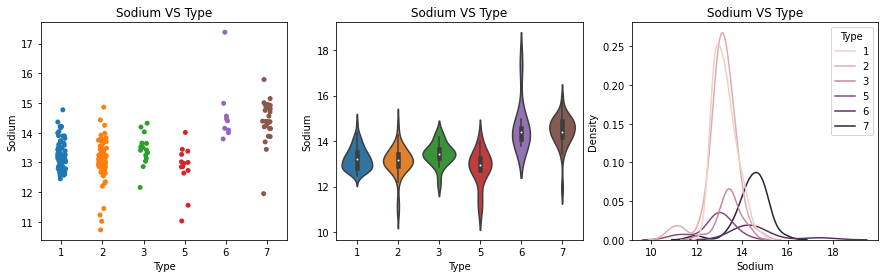

In [10]:
f,ax = plt.subplots(1,3,figsize=(15,4))
sns.stripplot(x=rawData.Type,y=rawData.Sodium,ax=ax[0])
ax[0].set_title('Sodium VS Type')
sns.violinplot(x=rawData.Type,y=rawData.Sodium,ax=ax[1])
ax[1].set_title('Sodium VS Type')
sns.kdeplot(hue=rawData.Type,x=rawData.Sodium,ax=ax[2])
ax[2].set_title('Sodium VS Type')

rawData.groupby('Type')['Sodium'].mean().transpose().to_frame().style.background_gradient(cmap='summer')

Even in case of Sodium, the data point are overlapping and the clasess are not clearly identifyable. Yet it is better than the other variables. 

,Magnesium
Type,
1,3.552429
2,3.002105
3,3.543529
5,0.773846
6,1.305556
7,0.538276


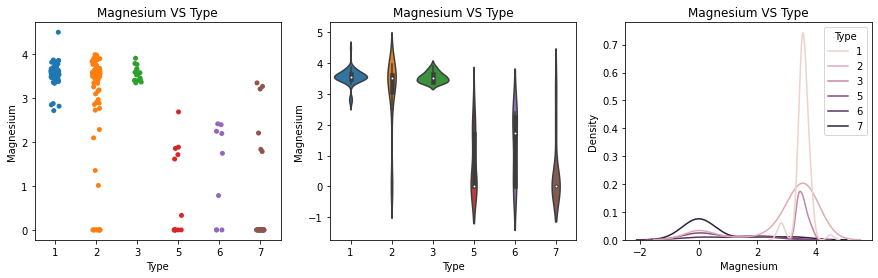

In [11]:
f,ax = plt.subplots(1,3,figsize=(15,4))
sns.stripplot(x=rawData.Type,y=rawData.Magnesium,ax=ax[0])
ax[0].set_title('Magnesium VS Type')
sns.violinplot(x=rawData.Type,y=rawData.Magnesium,ax=ax[1])
ax[1].set_title('Magnesium VS Type')
sns.kdeplot(hue=rawData.Type,x=rawData.Magnesium,ax=ax[2])
ax[2].set_title('Magnesium VS Type')

rawData.groupby('Type')['Magnesium'].mean().transpose().to_frame().style.background_gradient(cmap='summer')

Evan in case of Magnesium the distibution accross classes are distingishable with different mean and SD. This feature can act as a good predictor and a clear distinguisher of each class.

,Aluminum
Type,
1,1.163857
2,1.408158
3,1.201176
5,2.033846
6,1.366667
7,2.122759


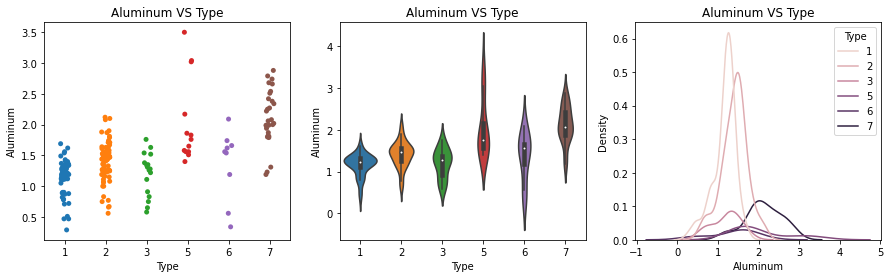

In [12]:
f,ax = plt.subplots(1,3,figsize=(15,4))
sns.stripplot(x=rawData.Type,y=rawData.Aluminum,ax=ax[0])
ax[0].set_title('Aluminum VS Type')
sns.violinplot(x=rawData.Type,y=rawData.Aluminum,ax=ax[1])
ax[1].set_title('Aluminum VS Type')
sns.kdeplot(hue=rawData.Type,x=rawData.Aluminum,ax=ax[2])
ax[2].set_title('Aluminum VS Type')

rawData.groupby('Type')['Aluminum'].mean().transpose().to_frame().style.background_gradient(cmap='twilight')

In case of Aluminum the distibution of datapoint for each class are slightly distinguishable atleast in some of the classes. hence this might be a good feature.

,Silicon
Type,
1,72.619143
2,72.598026
3,72.404706
5,72.366154
6,73.206667
7,72.965862


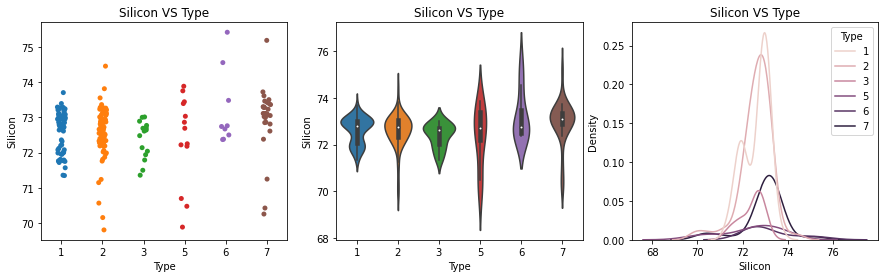

In [13]:
f,ax = plt.subplots(1,3,figsize=(15,4))
sns.stripplot(x=rawData.Type,y=rawData.Silicon,ax=ax[0])
ax[0].set_title('Silicon VS Type')
sns.violinplot(x=rawData.Type,y=rawData.Silicon,ax=ax[1])
ax[1].set_title('Silicon VS Type')
sns.kdeplot(hue=rawData.Type,x=rawData.Silicon,ax=ax[2])
ax[2].set_title('Silicon VS Type')

rawData.groupby('Type')['Silicon'].mean().transpose().to_frame().style.background_gradient(cmap='summer')

In case of Silicon all values are more or less in the same range. which clearly means this feature will not help in prediction. Or it might have least importance or prediction of type is little dipendency on Silicon

C:\Users\MMM-SM\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


,Potassium
Type,
1,0.447429
2,0.521053
3,0.406471
5,1.470000
6,0.000000
7,0.325172


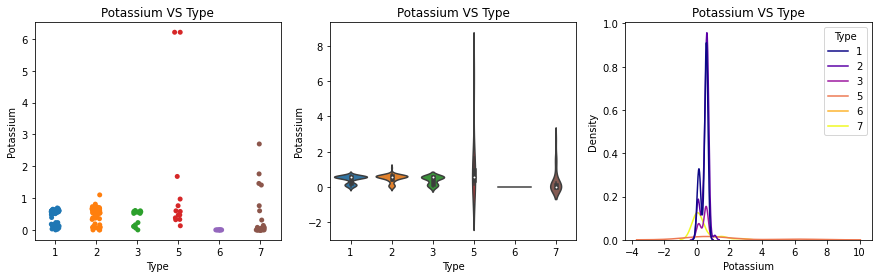

In [14]:
f,ax = plt.subplots(1,3,figsize=(15,4))
sns.stripplot(x=rawData.Type,y=rawData.Potassium,ax=ax[0])
ax[0].set_title('Potassium VS Type')
sns.violinplot(x=rawData.Type,y=rawData.Potassium,ax=ax[1])
ax[1].set_title('Potassium VS Type')
sns.kdeplot(hue=rawData.Type,x=rawData.Potassium,ax=ax[2],palette='plasma')
ax[2].set_title('Potassium VS Type')

rawData[['Potassium','Type']].groupby('Type').mean().style.background_gradient(cmap='summer')

Potassium is also a not good predictor of Type as all values are in the same range.

,Calcium
Type,
1,8.797286
2,9.073684
3,8.782941
5,10.123846
6,9.356667
7,8.491379


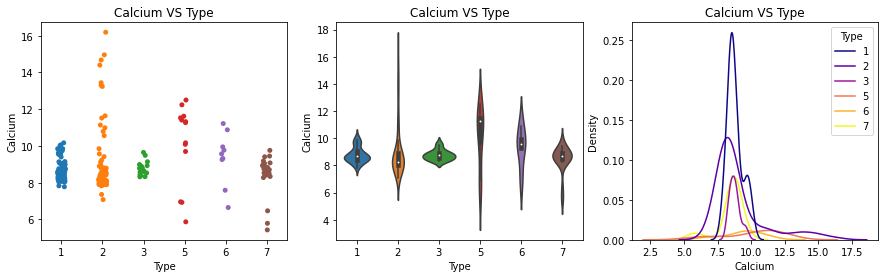

In [15]:
f,ax = plt.subplots(1,3,figsize=(15,4))
sns.stripplot(x=rawData.Type,y=rawData.Calcium,ax=ax[0])
ax[0].set_title('Calcium VS Type')
sns.violinplot(x=rawData.Type,y=rawData.Calcium,ax=ax[1])
ax[1].set_title('Calcium VS Type')
sns.kdeplot(hue=rawData.Type,x=rawData.Calcium,ax=ax[2],palette='plasma')
ax[2].set_title('Calcium VS Type')

rawData[['Calcium','Type']].groupby('Type').mean().style.background_gradient(cmap='summer')

Whereas Calcium can be an average predictor of all Types of glasses.

C:\Users\MMM-SM\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


,Barium
Type,
1,0.012714
2,0.050263
3,0.008824
5,0.187692
6,0.000000
7,1.040000


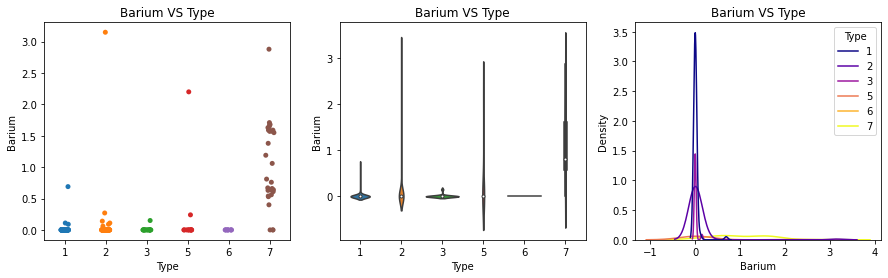

In [16]:
f,ax = plt.subplots(1,3,figsize=(15,4))
sns.stripplot(x=rawData.Type,y=rawData.Barium,ax=ax[0])
ax[0].set_title('Barium VS Type')
sns.violinplot(x=rawData.Type,y=rawData.Barium,ax=ax[1])
ax[1].set_title('Barium VS Type')
sns.kdeplot(hue=rawData.Type,x=rawData.Barium,ax=ax[2],palette='plasma')
ax[2].set_title('Barium VS Type')

rawData[['Barium','Type']].groupby('Type').mean().style.background_gradient(cmap='summer')

Again barium has little capacity to predict the Type of glass.

C:\Users\MMM-SM\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


,Iron
Type,
1,0.057000
2,0.079737
3,0.057059
5,0.060769
6,0.000000
7,0.013448


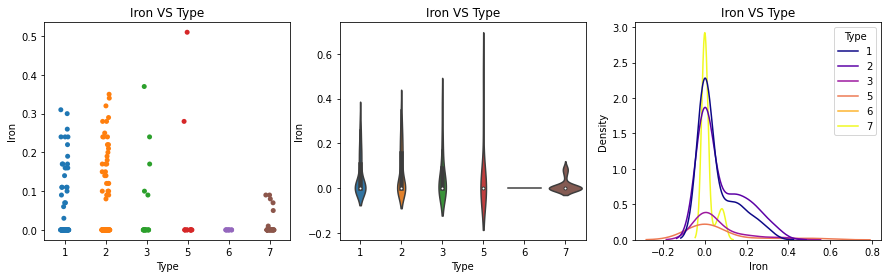

In [17]:
f,ax = plt.subplots(1,3,figsize=(15,4))
sns.stripplot(x=rawData.Type,y=rawData.Iron,ax=ax[0])
ax[0].set_title('Iron VS Type')
sns.violinplot(x=rawData.Type,y=rawData.Iron,ax=ax[1])
ax[1].set_title('Iron VS Type')
sns.kdeplot(hue=rawData.Type,x=rawData.Iron,ax=ax[2],palette='plasma')
ax[2].set_title('Iron VS Type')

rawData[['Iron','Type']].groupby('Type').mean().style.background_gradient(cmap='summer')

Iron can be an average predictor of the y varable.

'fivethirtyeight' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

In [18]:
rawData.groupby('Type').mean().transpose().style.background_gradient(cmap='prism')

Type,1,2,3,5,6,7
refractive_index,1.518718,1.518619,1.517964,1.518928,1.517456,1.517116
Sodium,13.242286,13.111711,13.437059,12.827692,14.646667,14.442069
Magnesium,3.552429,3.002105,3.543529,0.773846,1.305556,0.538276
Aluminum,1.163857,1.408158,1.201176,2.033846,1.366667,2.122759
Silicon,72.619143,72.598026,72.404706,72.366154,73.206667,72.965862
Potassium,0.447429,0.521053,0.406471,1.470000,0.000000,0.325172
Calcium,8.797286,9.073684,8.782941,10.123846,9.356667,8.491379
Barium,0.012714,0.050263,0.008824,0.187692,0.000000,1.040000
Iron,0.057000,0.079737,0.057059,0.060769,0.000000,0.013448


There is no independent variable / feature that individualy, will identify predict the dependent variable. Magnesium, Aluminum, give some degree of deffertiation but the over lap and higher and lower end. let us study the correlation between the variables.  

## Correlation among the variables / features

C:\Users\MMM-SM\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\MMM-SM\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\MMM-SM\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


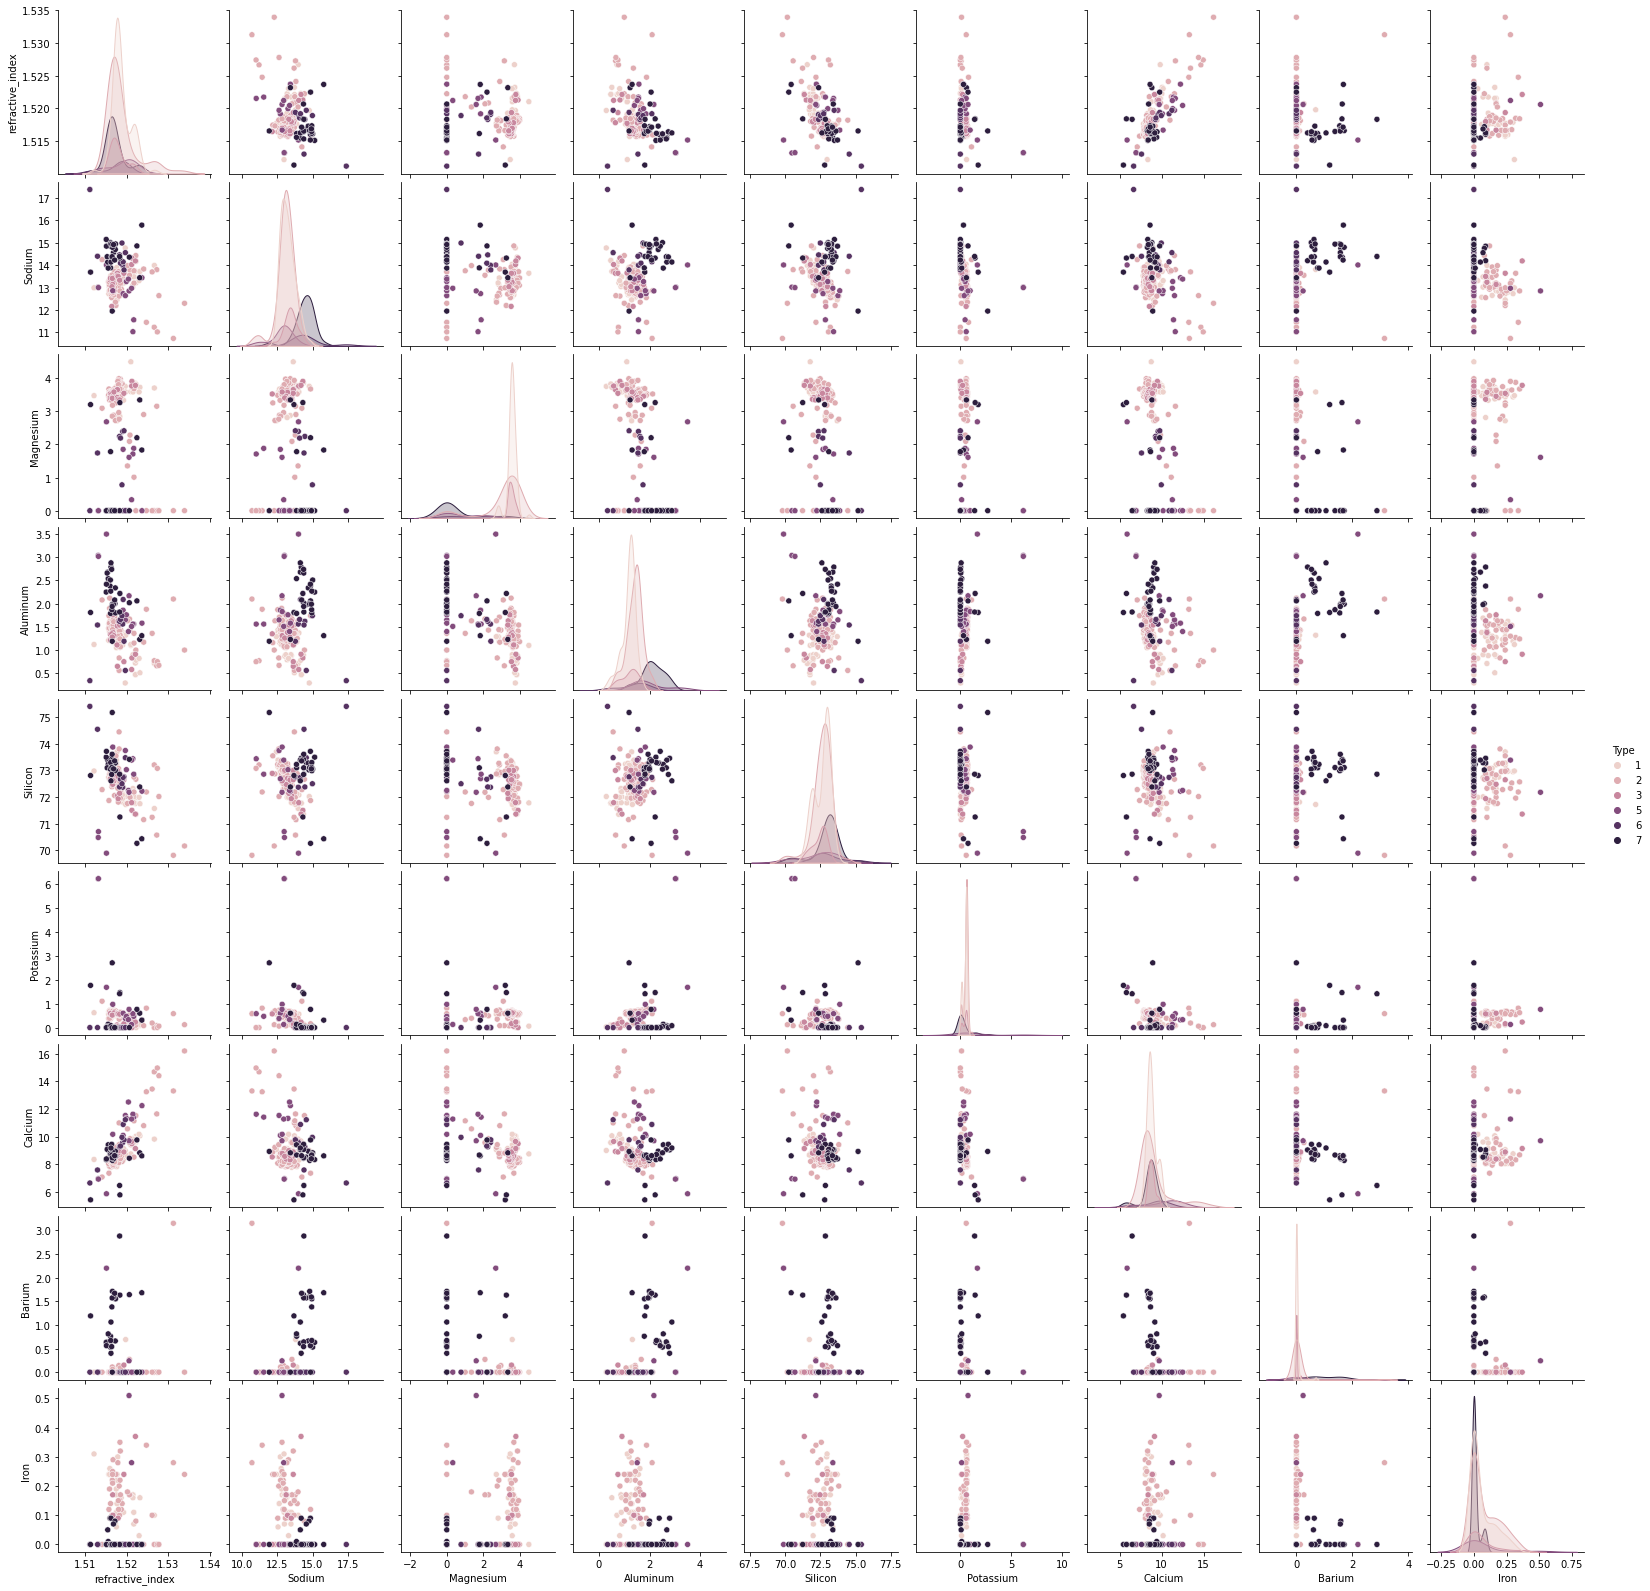

In [19]:
sns.pairplot(rawData,hue='Type')

<AxesSubplot:>

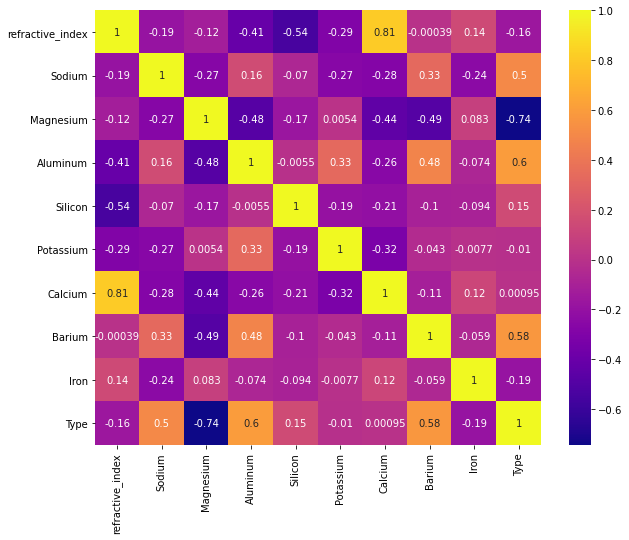

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(rawData.corr(),cmap='plasma',annot=True)

THERE IS NO POINT IN TAKING CORRELATION BETWEEN TYPE WITH OTHER VARIABLES AS 'TYPE' IS A CATEGORICAL VARIABLE.

However, if we see all ther independent variable for correlation we can see that all the variables are independent of each other. only Calcium and Refractive_index show some degree of correlation. 

Important point here is that since this is a classification model we will not use regression techniques. From that point of view we might say that the correlation is not required to be taken. but in case we want to use the logistic regression we will have to check linearity as logistic regression is a linear model.

**Conclusion**

*As this is a classification model and there is no linear relationship, infacr ther is no relationship at all amongst the variables. HENCE WE CAN SAY THE PARAMETRIC MODELS AND LINEAR MODELS ARE NOT SUITABLE FOR THIS CLASSIFICATION PROBLEM.*

# Data Cleaning and Feature Selection

There is no need to clean any data as ther no null values. outliers in univariate analysis do not matter in classification problem. but we can check them in multivariate analysis. 

For FEATURE SELECTION, let us try the doing 

    RFE
    PPSCORE
    Tree based feature importances

### Univariate Feature Selection

In [21]:
from sklearn.model_selection import KFold,cross_val_score,StratifiedKFold,GridSearchCV
from sklearn.feature_selection import SelectKBest,SelectKBest,chi2,f_classif,mutual_info_classif,RFE,RFECV
from sklearn.feature_selection import SelectFromModel 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [22]:
rawData.iloc[:,:-1]

,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [23]:
test = SelectKBest(score_func=chi2,k=3)  ## does not work with scaled data as chi2 values must be non negetive
f3 = test.fit(rawData.iloc[:,:-1],rawData.iloc[:,-1])
print(f'{f3.scores_}')

[4.81752628e-05 4.31125331e+00 1.00984212e+02 1.69774883e+01
 1.10449039e-01 3.16706320e+01 3.21092861e+00 1.45514077e+02
 2.17018493e+00]


In [24]:
np.set_printoptions(precision=4,floatmode='fixed',suppress=True)

In [25]:
print(f3.scores_)

[  0.0000   4.3113 100.9842  16.9775   0.1104  31.6706   3.2109 145.5141
   2.1702]


In [26]:
a = np.round(f3.scores_,4)
a

array([  0.0000,   4.3113, 100.9842,  16.9775,   0.1104,  31.6706,
         3.2109, 145.5141,   2.1702])

In [27]:
pd.DataFrame({'Chi_Score':a,'Features':rawData.columns[:-1]}).sort_values(by='Chi_Score',ascending=False).style.background_gradient(cmap='summer')

,Chi_Score,Features
7,145.514100,Barium
2,100.984200,Magnesium
5,31.670600,Potassium
3,16.977500,Aluminum
1,4.311300,Sodium
6,3.210900,Calcium
8,2.170200,Iron
4,0.110400,Silicon
0,0.000000,refractive_index


Text(0.5, 1.0, 'Chi_scores')

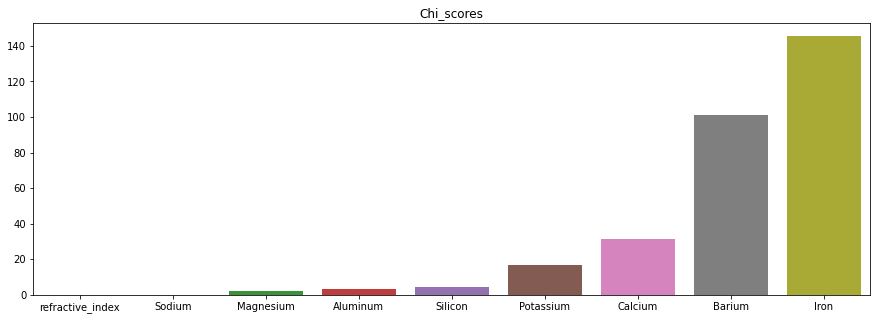

In [28]:
plt.figure(figsize=(15,5))
sns.barplot(x=rawData.columns[:-1],y=sorted(a))
plt.title('Chi_scores')

**The null hypothesis in Chi2 test of independence is 
H0 = There is no relationship between the variables (population)
H1 = There is relationship between the variables (population)**

**So, Higher the chi statistic we can say that there is a relationship between the columns and the y variable.**

**Hence, we can conclude that, Chiscore predicts that the Y is more dependent on Iron, Barium and Calcium.** however i dont trust this

## PPSCORE

In [29]:
import ppscore

In [30]:
d = rawData.copy(deep=True)
d.Type = d.Type.astype('category')

In [31]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   refractive_index  214 non-null    float64 
 1   Sodium            214 non-null    float64 
 2   Magnesium         214 non-null    float64 
 3   Aluminum          214 non-null    float64 
 4   Silicon           214 non-null    float64 
 5   Potassium         214 non-null    float64 
 6   Calcium           214 non-null    float64 
 7   Barium            214 non-null    float64 
 8   Iron              214 non-null    float64 
 9   Type              214 non-null    category
dtypes: category(1), float64(9)
memory usage: 15.6 KB


In [32]:
a = ppscore.matrix(d)
a[a.y == 'Type']

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
9,refractive_index,Type,0.341521,classification,True,weighted F1,0.214953,0.483063,DecisionTreeClassifier()
19,Sodium,Type,0.235713,classification,True,weighted F1,0.214953,0.399999,DecisionTreeClassifier()
29,Magnesium,Type,0.239933,classification,True,weighted F1,0.214953,0.403312,DecisionTreeClassifier()
39,Aluminum,Type,0.341242,classification,True,weighted F1,0.214953,0.482844,DecisionTreeClassifier()
49,Silicon,Type,0.156451,classification,True,weighted F1,0.214953,0.337775,DecisionTreeClassifier()
59,Potassium,Type,0.319766,classification,True,weighted F1,0.214953,0.465984,DecisionTreeClassifier()
69,Calcium,Type,0.222140,classification,True,weighted F1,0.214953,0.389343,DecisionTreeClassifier()
79,Barium,Type,0.126522,classification,True,weighted F1,0.214953,0.314279,DecisionTreeClassifier()
89,Iron,Type,0.015778,classification,True,weighted F1,0.214953,0.227339,DecisionTreeClassifier()
99,Type,Type,1.000000,predict_itself,True,None,0.000000,1.000000,None


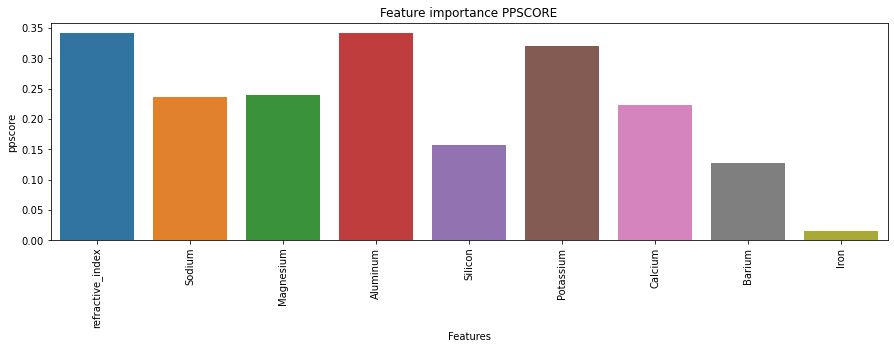

In [33]:
plt.figure(figsize=(15,4))
sns.barplot(x=a[a.y == 'Type'].x[:-1],y=a[a.y == 'Type'].ppscore,ci=None)
plt.title('Feature importance PPSCORE')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.show()

**So Refractive_index, Aluminum, Potassium are three most prominent features. Individually they carry the predictive score more than 30% each. **

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scale = StandardScaler()
d1 = scale.fit_transform(d.iloc[:,:-1])
d1

array([[ 0.8729,  0.2850,  1.2546, ..., -0.1458, -0.3529, -0.5865],
       [-0.2493,  0.5918,  0.6362, ..., -0.7937, -0.3529, -0.5865],
       [-0.7213,  0.1499,  0.6014, ..., -0.8289, -0.3529, -0.5865],
       ...,
       [ 0.7540,  1.1687, -1.8655, ..., -0.3641,  2.9532, -0.5865],
       [-0.6124,  1.1933, -1.8655, ..., -0.3359,  2.8121, -0.5865],
       [-0.4144,  1.0092, -1.8655, ..., -0.2373,  3.0137, -0.5865]])

In [36]:
dy = d[['Type']].values
d = np.concatenate((d1,dy),axis=1)
d[:5]

array([[ 0.8729,  0.2850,  1.2546, -0.6924, -1.1271, -0.6717, -0.1458,
        -0.3529, -0.5865,  1.0000],
       [-0.2493,  0.5918,  0.6362, -0.1705,  0.1023, -0.0262, -0.7937,
        -0.3529, -0.5865,  1.0000],
       [-0.7213,  0.1499,  0.6014,  0.1909,  0.4388, -0.1645, -0.8289,
        -0.3529, -0.5865,  1.0000],
       [-0.2328, -0.2429,  0.6987, -0.3110, -0.0530,  0.1121, -0.5191,
        -0.3529, -0.5865,  1.0000],
       [-0.3120, -0.1692,  0.6501, -0.4114,  0.5553,  0.0814, -0.6247,
        -0.3529, -0.5865,  1.0000]])

In [37]:
d = pd.DataFrame(data=d,columns=rawData.columns)
d.Type = d.Type.astype('category')
a = ppscore.matrix(d)
a[a.y == 'Type']

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
9,refractive_index,Type,0.328447,classification,True,weighted F1,0.214953,0.472800,DecisionTreeClassifier()
19,Sodium,Type,0.245824,classification,True,weighted F1,0.214953,0.407936,DecisionTreeClassifier()
29,Magnesium,Type,0.260379,classification,True,weighted F1,0.214953,0.419363,DecisionTreeClassifier()
39,Aluminum,Type,0.318082,classification,True,weighted F1,0.214953,0.464662,DecisionTreeClassifier()
49,Silicon,Type,0.166364,classification,True,weighted F1,0.214953,0.345557,DecisionTreeClassifier()
59,Potassium,Type,0.316902,classification,True,weighted F1,0.214953,0.463736,DecisionTreeClassifier()
69,Calcium,Type,0.214229,classification,True,weighted F1,0.214953,0.383133,DecisionTreeClassifier()
79,Barium,Type,0.126522,classification,True,weighted F1,0.214953,0.314279,DecisionTreeClassifier()
89,Iron,Type,0.016155,classification,True,weighted F1,0.214953,0.227636,DecisionTreeClassifier()
99,Type,Type,1.000000,predict_itself,True,None,0.000000,1.000000,None


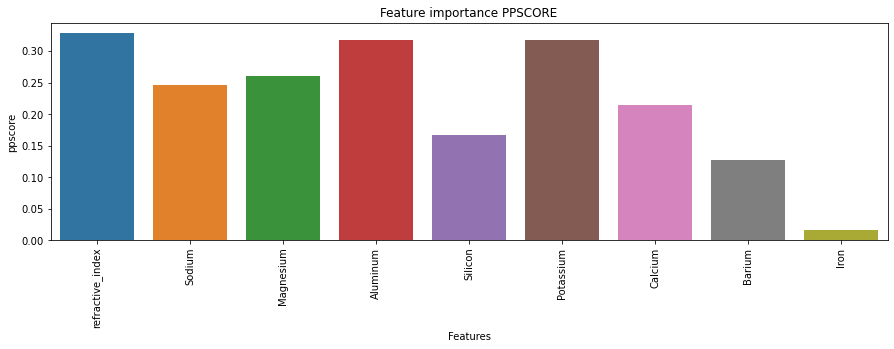

In [38]:
plt.figure(figsize=(15,4))
sns.barplot(x=a[a.y == 'Type'].x[:-1],y=a[a.y == 'Type'].ppscore,ci=None)
plt.title('Feature importance PPSCORE')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.show()

There is slight impact on the predictive score of the collumns after scale. but this is no big change. Note: we need to pass the datafrme to the PPSCORE not ndarray.

## RFE

In [39]:
Y=d.Type.values
Y

[1.0, 1.0, 1.0, 1.0, 1.0, ..., 7.0, 7.0, 7.0, 7.0, 7.0]
Length: 214
Categories (6, float64): [1.0, 2.0, 3.0, 5.0, 6.0, 7.0]

In [40]:
X = d.drop('Type',axis=1).values
X

array([[ 0.8729,  0.2850,  1.2546, ..., -0.1458, -0.3529, -0.5865],
       [-0.2493,  0.5918,  0.6362, ..., -0.7937, -0.3529, -0.5865],
       [-0.7213,  0.1499,  0.6014, ..., -0.8289, -0.3529, -0.5865],
       ...,
       [ 0.7540,  1.1687, -1.8655, ..., -0.3641,  2.9532, -0.5865],
       [-0.6124,  1.1933, -1.8655, ..., -0.3359,  2.8121, -0.5865],
       [-0.4144,  1.0092, -1.8655, ..., -0.2373,  3.0137, -0.5865]])

In [41]:
m1 = LogisticRegression(class_weight=None,random_state=0,verbose=1,max_iter=5000)
rfe = RFE(m1,n_features_to_select=3,verbose=1)
f1 = rfe.fit(X,Y)

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [42]:
f1.support_

array([False, False,  True,  True, False,  True, False, False, False])

In [43]:
f1.ranking_

array([5, 2, 1, 1, 4, 1, 6, 3, 7])

In [44]:
a = rawData.columns[:-1]
pd.DataFrame({'Ranking' : f1.ranking_,"Features" : a}).sort_values(by='Ranking').style.background_gradient('plasma')

,Ranking,Features
2,1,Magnesium
3,1,Aluminum
5,1,Potassium
1,2,Sodium
7,3,Barium
4,4,Silicon
0,5,refractive_index
6,6,Calcium
8,7,Iron


***As expected the Magnesium, Alluminium and Potassium are selected are three best features in that order. This matches with our univariate analysis.

## Decision Tree based Feature Importance

In [45]:
m2 = DecisionTreeClassifier(class_weight='balanced',random_state=0)
f2 = m2.fit(X,Y)

In [46]:
f2.feature_importances_

array([0.1478, 0.2287, 0.2218, 0.0541, 0.0534, 0.0040, 0.0725, 0.1847,
       0.0330])

In [47]:
## previous out put for non scaled data 
# feature importeances is --- array([0.14783919, 0.22868698, 0.22180809, 0.05414367, 0.05340893,
#       0.00402685, 0.07245644, 0.18466176, 0.03296809])

In [48]:
SFM = SelectFromModel(m2,prefit=True) # it will transform the datset by discarding irrelevant features/ noise
X_new = SFM.transform(X)
X_new.shape

(214, 4)

In [49]:
X_new[:10]

array([[ 0.8729,  0.2850,  1.2546, -0.3529],
       [-0.2493,  0.5918,  0.6362, -0.3529],
       [-0.7213,  0.1499,  0.6014, -0.3529],
       [-0.2328, -0.2429,  0.6987, -0.3529],
       [-0.3120, -0.1692,  0.6501, -0.3529],
       [-0.7939, -0.7584,  0.6431, -0.3529],
       [-0.3087, -0.1324,  0.6362, -0.3529],
       [-0.2658, -0.3165,  0.6431, -0.3529],
       [ 0.2689,  0.7759,  0.6223, -0.3529],
       [-0.2691, -0.5006,  0.6362, -0.3529]])

In [50]:
pd.DataFrame({'Score' : f2.feature_importances_, 'Feature' : rawData.columns[:-1]}
            ).sort_values(by='Score',ascending=False).style.background_gradient(cmap='summer')

,Score,Feature
1,0.228687,Sodium
2,0.221808,Magnesium
7,0.184662,Barium
0,0.147839,refractive_index
6,0.072456,Calcium
3,0.054144,Aluminum
4,0.053409,Silicon
8,0.032968,Iron
5,0.004027,Potassium


Decision Tree with Gini index has identified Sodium, Magnesium, Barium as three best features to predict the Type.

# Model Building

## Cross Validation

In [51]:
kf = KFold(6,shuffle=True,random_state=0)
RFT = RandomForestClassifier(n_estimators=200,class_weight='balanced_subsample',random_state=0)
a = cross_val_score(RFT,X,Y,cv=kf)
print('RANDOMFOREST Cross val scores\n')
print(f'6 fold cross validataion scores are {a}  and the mean score is {a.mean()}.')
# cross_val_score(RFT,X,Y,cv=kf)

RANDOMFOREST Cross val scores

6 fold cross validataion scores are [0.6389 0.8333 0.7222 0.8333 0.7714 0.8286]  and the mean score is 0.7712962962962964.


In [52]:
ADB = AdaBoostClassifier(n_estimators=200)
b = cross_val_score(ADB,X,Y,cv=kf)
print('AdaBoost - Cross val scores\n')
print(f'6 fold cross validataion scores are {b}  and the mean score is {b.mean()}.')
cross_val_score(ADB,X,Y,cv=kf)

AdaBoost - Cross val scores

6 fold cross validataion scores are [0.3056 0.3333 0.4722 0.5000 0.3714 0.3143]  and the mean score is 0.38280423280423276.


array([0.3056, 0.3333, 0.4722, 0.5000, 0.3714, 0.3143])

In [53]:
LR = LogisticRegression(max_iter=3000)
c = cross_val_score(LR,X,Y,cv=kf)
print('LogisticRegression - Cross val scores\n')
print(f'6 fold cross validataion scores are {c}  and the mean score is {c.mean()}.')
cross_val_score(LR,X,Y,cv=kf)

LogisticRegression - Cross val scores

6 fold cross validataion scores are [0.5278 0.5556 0.6389 0.7222 0.6857 0.6571]  and the mean score is 0.6312169312169312.


array([0.5278, 0.5556, 0.6389, 0.7222, 0.6857, 0.6571])

In [54]:
## m2 the Decision Tree Classifier - created previous for feature importances
d = cross_val_score(m2,X,Y,cv=kf)
print('DecitionTree - Cross val scores\n')
print(f'6 fold cross validataion scores are {d}  and the mean score is {d.mean()}.')
cross_val_score(m2,X,Y,cv=kf)

DecitionTree - Cross val scores

6 fold cross validataion scores are [0.5833 0.7500 0.5833 0.7222 0.5429 0.7143]  and the mean score is 0.6493386243386244.


array([0.5833, 0.7500, 0.5833, 0.7222, 0.5429, 0.7143])

In [55]:
knn = KNeighborsClassifier(n_neighbors=15)
e = cross_val_score(knn,X,Y,cv=kf)
print('KNneighbors - Cross val scores\n')
print(f'6 fold cross validataion scores are {e}  and the mean score is {e.mean()}.')
e

KNneighbors - Cross val scores

6 fold cross validataion scores are [0.6111 0.6111 0.5278 0.6389 0.5143 0.7143]  and the mean score is 0.602910052910053.


array([0.6111, 0.6111, 0.5278, 0.6389, 0.5143, 0.7143])

               Models  Cross_Scores
0        RandomForest      0.771296
1             AdaBost      0.382804
2  LogisticRegression      0.631217
3        DecisionTree      0.649339
4                K-NN      0.602910


<ipython-input-56-843608ccc5b3>:6: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x=z.Models, height=z.Cross_Scores,width=.8,edgecolor='black',color='rgbym')


Text(0.5, 1.0, 'Cross-Validation Scores')

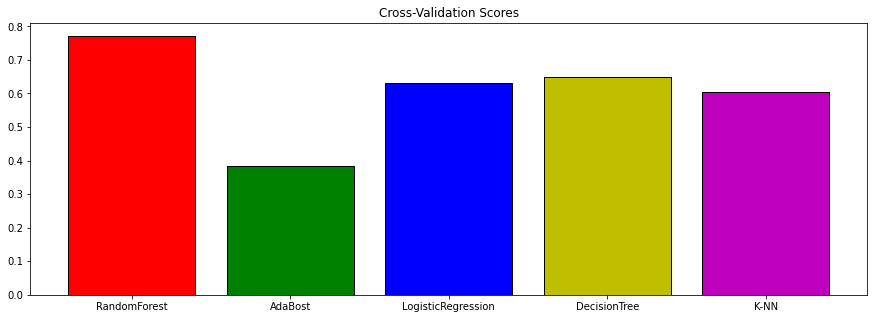

In [56]:
z = pd.DataFrame({'Models':['RandomForest','AdaBost','LogisticRegression','DecisionTree','K-NN'],
                  'Cross_Scores':[a.mean(),b.mean(),c.mean(),d.mean(),e.mean()]
                 })
print(z)
plt.figure(figsize=(15,5))
plt.bar(x=z.Models, height=z.Cross_Scores,width=.8,edgecolor='black',color='rgbym')
# plt.xticks(roatation = 90)
plt.title('Cross-Validation Scores')

Random Forest has the highest score. but our objective is to build KNN model. possibly we need to find the Right value for K to get better results.

**Previous Score - before Scaling the data**

                Models       Cross_Scores
    0        RandomForest      0.771296 
    1             AdaBost      0.382804 
    2  LogisticRegression      0.607804 
    3        DecisionTree      0.649339 
    4                K-NN      0.621825 

**Current Scores - After Scaling the data**

                Models       Cross_Scores
    0        RandomForest      0.771296
    1             AdaBost      0.382804
    2  LogisticRegression      0.631217
    3        DecisionTree      0.649339
    4                K-NN      0.602910

**Clearly some model are sensitive to scale and some are not. If we can note that Decision Trees are completely immune to scales, where as linear modes - logistic Regression in this case and distance based model - KNN in this case are sensitive to scale, both show variance in the mean accuracy.**

### Grid Search for Finding the K value

In [57]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, return_train_score=False ,param_grid=dict(n_neighbors=np.array(range(1,41))))
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40])})

In [58]:
print(grid.best_score_)
print(grid.best_params_)

0.6729789590254706
{'n_neighbors': 2}


In [59]:
grid.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsClassifier(),
 'iid': 'deprecated',
 'n_jobs': None,
 'param_grid': {'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
         35, 36, 37, 38, 39, 40])},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [60]:
grid.return_train_score

False

In [61]:
grid.cv_results_

{'mean_fit_time': array([0.0005, 0.0020, 0.0003, 0.0021, 0.0000, 0.0035, 0.0025, 0.0004,
        0.0002, 0.0022, 0.0037, 0.0037, 0.0000, 0.0063, 0.0000, 0.0031,
        0.0000, 0.0032, 0.0033, 0.0000, 0.0038, 0.0004, 0.0002, 0.0000,
        0.0004, 0.0002, 0.0033, 0.0000, 0.0055, 0.0003, 0.0000, 0.0031,
        0.0036, 0.0025, 0.0027, 0.0024, 0.0017, 0.0002, 0.0034, 0.0000]),
 'std_fit_time': array([0.0011, 0.0032, 0.0006, 0.0033, 0.0000, 0.0061, 0.0029, 0.0008,
        0.0005, 0.0027, 0.0037, 0.0066, 0.0000, 0.0077, 0.0000, 0.0062,
        0.0000, 0.0063, 0.0062, 0.0000, 0.0066, 0.0007, 0.0004, 0.0000,
        0.0005, 0.0004, 0.0061, 0.0000, 0.0065, 0.0005, 0.0000, 0.0062,
        0.0061, 0.0022, 0.0016, 0.0029, 0.0029, 0.0004, 0.0038, 0.0000]),
 'mean_score_time': array([0.0035, 0.0057, 0.0066, 0.0036, 0.0066, 0.0063, 0.0030, 0.0068,
        0.0068, 0.0062, 0.0020, 0.0031, 0.0067, 0.0034, 0.0031, 0.0034,
        0.0063, 0.0036, 0.0033, 0.0069, 0.0039, 0.0073, 0.0034, 0.0062,
        

In [62]:
cvData = pd.DataFrame(grid.cv_results_)
cvData[['param_n_neighbors','mean_test_score','std_test_score','rank_test_score']].head(10)

,param_n_neighbors,mean_test_score,std_test_score,rank_test_score
0,1,0.621262,0.066179,7
1,2,0.672979,0.045877,1
2,3,0.649834,0.072318,2
3,4,0.631008,0.052713,4
4,5,0.649723,0.063124,3
5,6,0.626135,0.053150,5
6,7,0.621595,0.048832,6
7,8,0.616944,0.039332,8
8,9,0.616944,0.057251,8
9,10,0.612292,0.058979,10


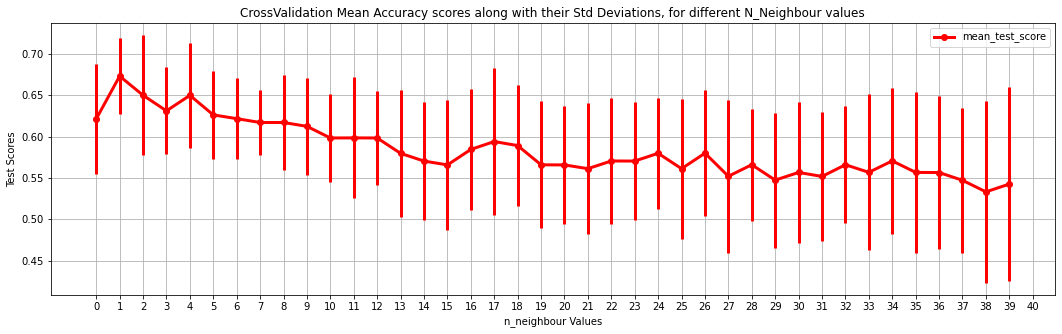

In [71]:
f,ax=plt.subplots(1,1,figsize=(18,5))
cvData.plot(ax=ax, y='mean_test_score', yerr='std_test_score',linewidth=3,marker='o',color='r',xticks=[a for a in range(41)])
plt.title('CrossValidation Mean Accuracy scores along with their Std Deviations, for different N_Neighbour values')
plt.xlabel('n_neighbour Values')
plt.ylabel('Test Scores')
plt.grid(b=True)
plt.show()

**So the grid search tells us that the best value for parameter n_neighbors is 2, Which has the highest mean_test_score and fairly low Std deviation in test score. Hence the K value should be 2.** 

### Visualizing the CV results (SAME AS ABOVE but different method)

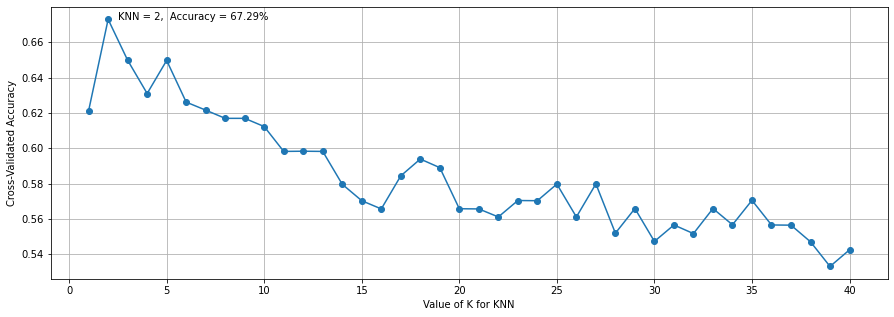

In [64]:
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.figure(figsize=(15,5))
plt.plot(k_range, k_scores,marker='o')
plt.annotate('KNN = 2,  Accuracy = 67.29%',(2,0.672979),xytext=(2.5,0.672979))
plt.grid()
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Final Model - with uniform weights

In [65]:
knn = KNeighborsClassifier(n_neighbors=2,algorithm='auto',leaf_size=30,metric='minkowski',metric_params=None,
                           n_jobs=None,p=2,weights='uniform',
                          )

In [66]:
kfold = KFold(n_splits=5,shuffle=True,random_state=0)
results = cross_val_score(knn,X,Y,cv=kfold)
results

array([0.5814, 0.7209, 0.6977, 0.6512, 0.7381])

In [67]:
print(results.mean())

0.6778516057585826


# Final Model - with distance based weight

In [68]:
knn = KNeighborsClassifier(n_neighbors=2,algorithm='auto',leaf_size=30,metric='minkowski',metric_params=None,
                           n_jobs=None,p=2,weights='distance',
                          )

In [69]:
kfold = KFold(n_splits=5,shuffle=True,random_state=0)
results = cross_val_score(knn,X,Y,cv=kfold)
results

array([0.6744, 0.7209, 0.6744, 0.7209, 0.7857])

In [70]:
print(results.mean())

0.715282392026578


# Conclusion

KNN works on distance to claculate the similarity or dissimilarity of datapoints. The classification are based the similarity based on the k nearest neighbours. Using the grid search we can find right set of parameteres to choose from the model. 

Baiscally the GridSearchcv function is used to find the optimum parameter values for the final model. As we can see the the best value for n_neighbours optimized by grid search was two which had the highest accuracy and fairly low standard Deviation.

overall accurcy for the model is 67.7% when wieghts set to uniform and the accuracy of the model is 71.5% when weights set to distance. Hence we finalize the Final model With weights as distance.